In [63]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline


In [64]:
def PD_Model (Conc, E_base, E_max, IC50, Hill_Coeff):
    E = E_base + np.divide(np.multiply(E_max,np.power(Conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(Conc,Hill_Coeff)))
    return E
PDModel = Model(PD_Model)

In [65]:
Data = [{'Bep':0, 'Ser':0, 'Res':0.0}]
Data.append({'Bep':0, 'Ser':0.63, 'Res':0.0})
Data.append({'Bep':0, 'Ser':1.25, 'Res':4.60})
Data.append({'Bep':0, 'Ser':2.5, 'Res':21.10})
Data.append({'Bep':0, 'Ser':5, 'Res':67.80})
Data.append({'Bep':0, 'Ser':10, 'Res':99.70})

Data.append({'Bep':0.63, 'Ser':0.0, 'Res':0.00})
Data.append({'Bep':0.63, 'Ser':0.63, 'Res':3.20})
Data.append({'Bep':0.63, 'Ser':1.25, 'Res':7.30})
Data.append({'Bep':0.63, 'Ser':2.5, 'Res':30.70})
Data.append({'Bep':0.63, 'Ser':5, 'Res':80.60})
Data.append({'Bep':0.63, 'Ser':10, 'Res':99.80})

Data.append({'Bep':1.25, 'Ser':0.0, 'Res':0.00})
Data.append({'Bep':1.25, 'Ser':0.63, 'Res':1.30})
Data.append({'Bep':1.25, 'Ser':1.25, 'Res':14.10})
Data.append({'Bep':1.25, 'Ser':2.5, 'Res':39.90})
Data.append({'Bep':1.25, 'Ser':5, 'Res':90.50})
Data.append({'Bep':1.25, 'Ser':10, 'Res':99.80})

Data.append({'Bep':2.5, 'Ser':0.0, 'Res':6.10})
Data.append({'Bep':2.5, 'Ser':0.63, 'Res':41.60})
Data.append({'Bep':2.5, 'Ser':1.25, 'Res':65.50})
Data.append({'Bep':2.5, 'Ser':2.5, 'Res':92.10})
Data.append({'Bep':2.5, 'Ser':5, 'Res':99.40})
Data.append({'Bep':2.5, 'Ser':10, 'Res':99.80})

Data.append({'Bep':5, 'Ser':0.0, 'Res':81.00})
Data.append({'Bep':5, 'Ser':0.63, 'Res':96.00})
Data.append({'Bep':5, 'Ser':1.25, 'Res':98.70})
Data.append({'Bep':5, 'Ser':2.5, 'Res':99.70})
Data.append({'Bep':5, 'Ser':5, 'Res':99.90})
Data.append({'Bep':5, 'Ser':10, 'Res':99.70})

Data.append({'Bep':10, 'Ser':0.0, 'Res':99.70})
Data.append({'Bep':10, 'Ser':0.63, 'Res':99.80})
Data.append({'Bep':10, 'Ser':1.25, 'Res':99.80})
Data.append({'Bep':10, 'Ser':2.5, 'Res':99.80})
Data.append({'Bep':10, 'Ser':5, 'Res':99.80})
Data.append({'Bep':10, 'Ser':10, 'Res':99.80})

In [66]:
Data_df = pd.DataFrame(Data)

Text(0.5, 15.0, 'Sertraline(uM)')

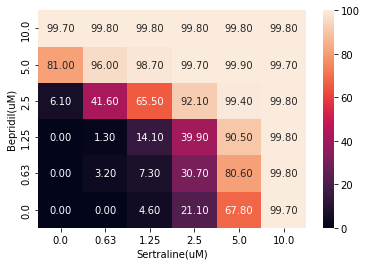

In [67]:
Data_plot = Data_df.pivot('Bep', 'Ser', 'Res')
ax1 = sns.heatmap(Data_plot, vmin =0, vmax = 100, annot = True, fmt = '0.2f')
ax1.invert_yaxis()
plt.ylabel('Bepridil(uM)')
plt.xlabel('Sertraline(uM)')

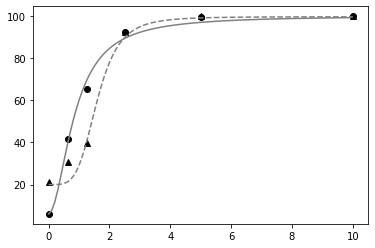

In [158]:
Bep_25_Data= Data_df[Data_df.Bep==2.5].Res
Combo_A = 0.061+0.939*np.linspace(0,10,100)**1.916/(0.8577**1.916+np.linspace(0,10,100)**1.916)

ser_25_Data= Data_df[Data_df.Ser==2.5].Res
Combo_B = 0.2+0.7955*np.linspace(0,10,100)**4.373/(1.598**4.373+np.linspace(0,10,100)**4.373)

plt.plot(Ser, Bep_25_Data, 'o', color = 'k', label = '2.5 $\my M$ bepridil data')
plt.plot(np.linspace(0,10,100),Combo_A*100, '-', color = 'grey', label='2.5 $\my M$ bepridil projection' )
plt.plot(Bep, ser_25_Data, '^', color = 'k', label = '2.5 $\my M$ sertraline data')
plt.plot(np.linspace(0,10,100),Combo_B*100, '--', color = 'grey', label = '2.5 $\my M$ sertraline projection' )

## Model A:
#### Bepridil upstream
#### Sertraline downstream

In [68]:
Bep = Data_df.Bep.unique()
Ser = Data_df.Ser.unique()
UpstreamRes = np.asarray(Data_df[Data_df.Bep==0].Res/100)
Downstream_Isol = np.asarray(Data_df[Data_df.Ser==0].Res/100)
Downstream_Res=[]


In [69]:
PDModel.set_param_hint('E_base', value=0, vary = False)
PDModel.set_param_hint('E_max', value=0.5, min=0, max=1)
PDModel.set_param_hint('IC50', value=10, min=0, max=np.inf)
PDModel.set_param_hint('Hill_Coeff', value=3, min=0, max=np.inf)
params = PDModel.make_params()

In [70]:
result_Ser= PDModel.fit(UpstreamRes, params, Conc=Ser)
result_Bep_Isol = PDModel.fit(Downstream_Isol, params, Conc=Bep)

In [71]:
result_Ser

In [72]:
np.sum((result_Ser.best_fit-UpstreamRes)**2)

0.0026109590746528294

In [87]:
for i in range(0,6):
    if i==0:
        E_B_Isol = result_Bep_Isol.best_fit
        E_S = result_Ser.best_fit
    else:
        E_B_Isol = np.vstack((E_B_Isol,result_Bep_Isol.best_fit))
        E_S = np.vstack((E_S,result_Ser.best_fit))

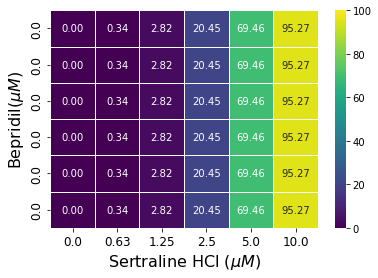

In [88]:
ax1 = sns.heatmap(E_S*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = np.zeros(6), xticklabels = Ser)
ax1.invert_yaxis()
ax1.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [73]:
result_Bep_Isol

In [74]:
np.sum((result_Bep_Isol.best_fit-Downstream_Isol)**2)

1.2879522303519048e-06

0.63
0.0010273044960644978
1.25
0.0007259087867423369
2.5
0.0072955900755441155
5.0
0.0013717875134221739
10.0
8.128202831130296e-07


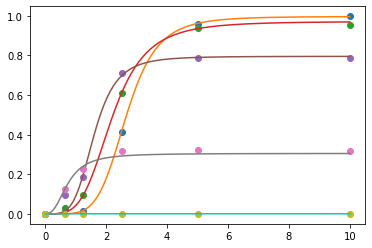

In [89]:
result_Bep=[]
IC50 =[3.211,2.723,0.8575,0.314, 0.314]
Hill = [3.158,3.126,1.916,1.895, 1.895]
i=0
Ecombo = result_Bep_Isol.best_fit
E_B = result_Bep_Isol.best_fit
for UpConc in Ser[1:]:
    print(UpConc)
    PDModel.set_param_hint('E_base', value=0, vary = False)
    PDModel.set_param_hint('IC50', value=IC50[i], min=0, max=np.inf)
    PDModel.set_param_hint('Hill_Coeff', value=Hill[i], min=0, max=np.inf)
    PDModel.set_param_hint('E_max', value=1-PDModel.eval(result_Ser.params, Conc = UpConc), min=0, max=1, vary=False)
    params = PDModel.make_params()
    Downstream_Res = (np.asarray(Data_df[Data_df.Ser == UpConc].Res)-
                      np.asarray(Data_df[(Data_df.Bep == 0)&(Data_df.Ser == UpConc)].Res))/100
   # Downstream_Res= (np.asarray(Data_df[Data_df.Ser == UpConc].Res)/100-
   #                   PDModel.eval(result_Ser.params, Conc = UpConc))
    result_Bep.append(PDModel.fit(Downstream_Res, params, Conc=Bep))
    print(np.sum((result_Bep[-1].best_fit-Downstream_Res)**2))
    Ecombo = np.vstack((Ecombo, PDModel.eval(result_Bep[i].params, Conc = Bep)
                        +PDModel.eval(result_Ser.params, Conc = UpConc)))
    E_B = np.vstack((E_B,result_Bep[-1].best_fit))
    plt.plot(Bep, Downstream_Res, 'o')
    plt.plot(np.linspace(Bep[0],Bep[-1], 100), PDModel.eval(result_Bep[i].params, Conc = np.linspace(Bep[0],Bep[-1], 100)))
    i=i+1

In [76]:
result_Bep[4]

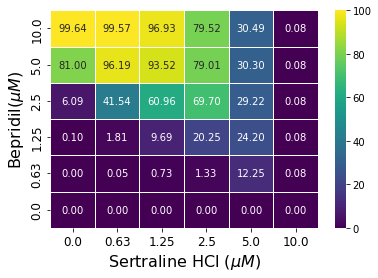

In [91]:
ax1 = sns.heatmap(E_B.T*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Bep, xticklabels = Ser)
ax1.invert_yaxis()
ax1.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [79]:
Ecombo*100

array([[0.00000000e+00, 1.57645387e-03, 9.86371294e-02, 6.09315872e+00,
        8.10031922e+01, 9.96444054e+01],
       [3.35493282e-01, 3.85049967e-01, 2.14244776e+00, 4.18796149e+01,
        9.65237367e+01, 9.99070397e+01],
       [2.82308298e+00, 3.54822775e+00, 1.25122130e+01, 6.37837294e+01,
        9.63444193e+01, 9.97507215e+01],
       [2.04503696e+01, 2.17843424e+01, 4.06963336e+01, 9.01500154e+01,
        9.94612913e+01, 9.99738408e+01],
       [6.94648706e+01, 8.17116838e+01, 9.36643405e+01, 9.86856257e+01,
        9.97658330e+01, 9.99595112e+01],
       [9.52676432e+01, 9.53462823e+01, 9.53468931e+01, 9.53475157e+01,
        9.53481431e+01, 9.53487754e+01]])

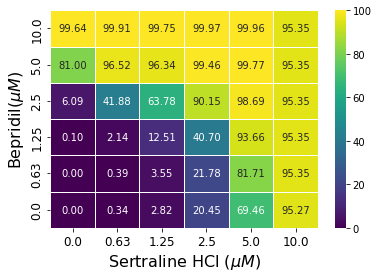

In [92]:
ax1 = sns.heatmap(Ecombo.T*100, vmin =0, vmax = 100, annot = True, fmt = '.2f', cmap ='viridis', linewidth = 1,
                 yticklabels = Bep, xticklabels = Ser)
ax1.invert_yaxis()
ax1.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [95]:
delta_E = Ecombo.T*100-np.minimum(100,(E_B_Isol.T*100+E_S*100))

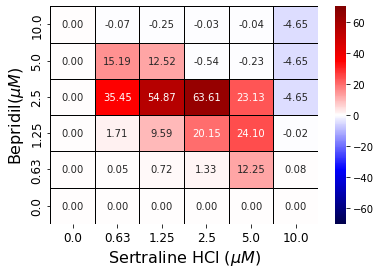

In [96]:
ax = sns.heatmap(delta_E, vmin =-70, vmax = 70, annot = True, fmt = '.2f', cmap ='seismic', linewidth = 0.5, 
                 linecolor = 'k', yticklabels = Bep, xticklabels = Ser)
ax.invert_yaxis()
ax.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [81]:
Data_array= np.asarray(Data_plot)
Data_array

array([[ 0. ,  0. ,  4.6, 21.1, 67.8, 99.7],
       [ 0. ,  3.2,  7.3, 30.7, 80.6, 99.8],
       [ 0. ,  1.3, 14.1, 39.9, 90.5, 99.8],
       [ 6.1, 41.6, 65.5, 92.1, 99.4, 99.8],
       [81. , 96. , 98.7, 99.7, 99.9, 99.7],
       [99.7, 99.8, 99.8, 99.8, 99.8, 99.8]])

In [82]:
np.sum((Data_array-Ecombo.T*100)**2)

254.27155675019338

In [83]:
np.sum((Data_array-np.mean(Data_array))**2)

62704.91000000001

In [84]:
1-np.sum((Data_array-Ecombo.T*100)**2)/np.sum((Data_array-np.mean(Data_array))**2)

0.9959449498173238

In [85]:
IC50_Bep = [3.932]
IC50_Bep_err = [0.0035]
Hill_Bep = [6.038]
Hill_Bep_err = [0.018]
for i in range(0,len(Ser[1:])):
    IC50_Bep.append(result_Bep[i].params['IC50'].value)
    IC50_Bep_err.append(result_Bep[i].params['IC50'].stderr)
    Hill_Bep.append(result_Bep[i].params['Hill_Coeff'].value)
    Hill_Bep_err.append(result_Bep[i].params['Hill_Coeff'].stderr)

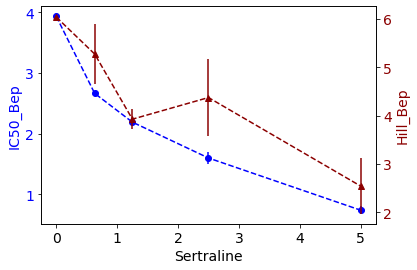

In [86]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx() 
ax1.errorbar(Ser[0:5], IC50_Bep[0:5],yerr = IC50_Bep_err[0:5], fmt = '--o', color = 'b')
ax1.set_ylabel("IC50_Bep", color='b', fontsize=14)
ax1.tick_params(axis="y", labelcolor='b',labelsize = 14)
ax1.set_xlabel('Sertraline', fontsize=14)
ax1.tick_params(axis="x", labelsize = 14)
ax2.errorbar(Ser[0:5], Hill_Bep[0:5], yerr = Hill_Bep_err[0:5], fmt = '--^', color = 'darkred')
ax2.set_ylabel("Hill_Bep", color='darkred', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkred', labelsize = 14)

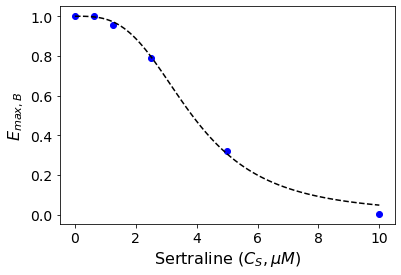

In [148]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(Bep, 1-np.asarray(Data_df[(Data_df.Bep == 0)].Res)/100, 'o', color = 'b')
ax1.plot(np.linspace(Ser[0], Ser[-1], 100), 
         1-PDModel.eval(result_Ser.params, Conc = np.linspace(Ser[0], Ser[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$E_{max,B}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Sertraline ($C_S, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [149]:
r2_score(1-np.asarray(Data_df[(Data_df.Bep == 0)].Res)/100, 1-PDModel.eval(result_Ser.params, Conc = Ser))

0.9970270077694662

In [97]:
def double_exp(x, a, b, c, d, e):
    return a*np.exp(b*x)+c*np.exp(d*x)+e




def gaussian(x, a, b, c):
    return a * exp(-(x-b)**2 / c)

In [98]:



dbl_exp_model = Model(double_exp)

dbl_exp_model.set_param_hint('a', value=1, min = -np.inf, max = np.inf)
dbl_exp_model.set_param_hint('b', value=1, min=-np.inf, max=np.inf)
dbl_exp_model.set_param_hint('c', value=1, min=-np.inf, max=np.inf)
dbl_exp_model.set_param_hint('d', value=1, min=-np.inf, max=np.inf)
dbl_exp_model.set_param_hint('e', value=0, min=-np.inf, max=np.inf)

binomial_model = Model(binomial)

binomial_model.set_param_hint('a', value=1, min = -np.inf, max = np.inf)
binomial_model.set_param_hint('b', value=1, min=-np.inf, max=np.inf)
binomial_model.set_param_hint('c', value=1, min=-np.inf, max=np.inf)
binomial_model.set_param_hint('d', value=0, min=-np.inf, max=np.inf)




gaussian_model = Model(gaussian)

gaussian_model.set_param_hint('a', value=1, min = 0, max = np.inf)
gaussian_model.set_param_hint('b', value=1, min=0, max=np.inf)
gaussian_model.set_param_hint('c', value=0, min=0, max=np.inf)


In [141]:
def exponential(x, a, b, c):
    return a*np.exp(b*x)+c
exp_model = Model(exponential)

exp_model.set_param_hint('a', value=3.5, min = 0, max = np.inf)
exp_model.set_param_hint('b', value=-0.5, min=-np.inf, max=0)
exp_model.set_param_hint('c', value=0.5, min=0, max=np.inf)
params = exp_model.make_params()

IC50_B = exp_model.fit(IC50_Bep[0:5], params, x = Ser[0:5], weights = 1.0/np.asarray(IC50_Bep_err[0:5]))
IC50_B_NW = exp_model.fit(IC50_Bep[0:5], params, x = Ser[0:5])

In [121]:
print(IC50_Bep_err[0:5])
print(1.0/np.asarray(IC50_Bep_err[0:5]))

[0.0035, 0.03701456039893264, 0.0313177184250025, 0.09235787202919386, 0.06152018464611209]
[285.71428571  27.01639542  31.93080627  10.82744739  16.25482768]


In [122]:
IC50_B

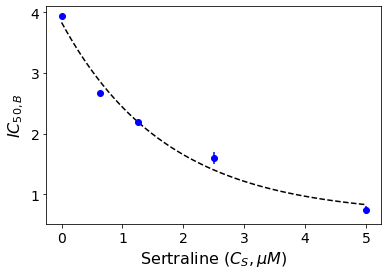

In [128]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Ser[0:5], IC50_Bep[0:5], yerr = IC50_Bep_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Ser[0], Ser[4], 100), 
         exp_model.eval(IC50_B_NW.params, x=np.linspace(Ser[0], Ser[4], 100)), '--', color = 'k')
ax1.set_ylabel("$IC_{50,B}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Sertraline ($C_S, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [125]:
from sklearn.metrics import r2_score
r2_score(IC50_Bep[0:5], exp_model.eval(IC50_B.params, x=Ser[0:5]), sample_weight= 1.0/np.asarray(IC50_Bep_err[0:5]))

0.9935727862411621

In [129]:
def binomial(x, a, b, c, d):
    return a*x+b*x**2+c*x**3+d
binomial_model = Model(binomial)

binomial_model.set_param_hint('a', value=-2, min = -np.inf, max = 0)
binomial_model.set_param_hint('b', value=0.2, min=0, max=np.inf)
binomial_model.set_param_hint('c', value=-1, min=-np.inf, max=0)
binomial_model.set_param_hint('d', value=4, min=0, max=np.inf)
params = binomial_model.make_params()

Hill_B = binomial_model.fit(Hill_Bep[0:5], params, x =Ser[0:5], weights = 1.0/np.asarray(Hill_Bep_err[0:5]) )


In [130]:
Hill_B

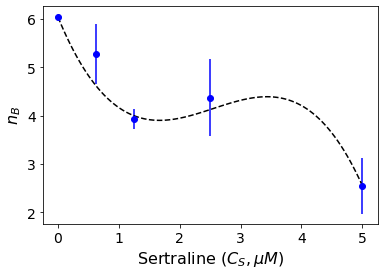

In [133]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Ser[0:5], Hill_Bep[0:5], yerr = Hill_Bep_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Ser[0], Ser[4], 100), 
         binomial_model.eval(Hill_B.params, x=np.linspace(Ser[0], Ser[4], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{B}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Sertraline ($C_S, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [134]:
from sklearn.metrics import r2_score
r2_score(Hill_Bep[0:5], binomial_model.eval(Hill_B.params, x=Ser[0:5]), sample_weight= 1.0/np.asarray(Hill_Bep_err[0:5]))

0.9797335132427303

In [139]:
def multiExpo (x, a, b, c):
    return (np.exp(-a*x)+np.exp(-b*x))*(1-np.exp(-c*x))

multiExpo_model = Model(multiExpo)

multiExpo_model.set_param_hint('a', value=0.5, min = 0, max = np.inf)
multiExpo_model.set_param_hint('b', value=0.2, min=0, max=np.inf)
multiExpo_model.set_param_hint('c', value=0.02, min=0, max=np.inf)

params = multiExpo_model.make_params()

Hill_multiexp = multiExpo_model.fit(Hill_Bep[0:5], params, x= Ser[0:5], weights = 1.0/np.asarray(Hill_Bep_err[0:5]))

In [142]:
Hill_exp = exp_model.fit(Hill_Bep[0:5], params, x= Ser[0:5], weights = 1.0/np.asarray(Hill_Bep_err[0:5]))

In [143]:
Hill_exp

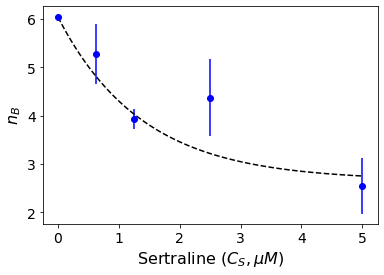

In [144]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Ser[0:5], Hill_Bep[0:5], yerr = Hill_Bep_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Ser[0], Ser[4], 100), 
         exp_model.eval(Hill_exp.params, x=np.linspace(Ser[0], Ser[4], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{B}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Sertraline ($C_S, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [146]:
from sklearn.metrics import r2_score
r2_score(Hill_Bep[0:5], exp_model.eval(Hill_exp.params, x=Ser[0:5]), sample_weight= 1.0/np.asarray(Hill_Bep_err[0:5]))

0.9468776025667472